<a href="https://colab.research.google.com/github/ONowakowski/howToDataInPython/blob/master/pandas_how_to_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def fetch_financial_data(company="AMZN"):
  #Pobiera dane dotyczące notowan spolek na podstawie symboli w serwisie yahoo
  import pandas_datareader as pdr
  return pdr.DataReader(name=company, data_source='yahoo')

df = fetch_financial_data()
df.info() #info dotyczące typu, indeksow, ilosci wierszy, ilosci wartosci w kazdej kolumnie, typy wartosci w kolumnach

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-10-26 to 2020-10-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   int64  
 5   Adj Close  1259 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-26,609.849976,596.289978,602.299988,608.609985,4269700,608.609985
2015-10-27,614.710022,605.530029,608.599976,611.010010,3787100,611.010010
2015-10-28,617.229980,609.500000,612.299988,617.099976,3926200,617.099976
2015-10-29,627.539978,615.390015,617.700012,626.549988,3896000,626.549988
2015-10-30,630.719971,625.280029,626.010010,625.900024,3874400,625.900024
...,...,...,...,...,...,...
2020-10-19,3329.000000,3192.739990,3299.610107,3207.209961,5223600,3207.209961
2020-10-20,3266.000000,3192.010010,3222.280029,3217.010010,4509700,3217.010010
2020-10-21,3233.879883,3160.000000,3212.500000,3184.939941,4592700,3184.939941


In [ ]:
df.head() #pierwsze 5 wierszy

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-26,609.849976,596.289978,602.299988,608.609985,4269700,608.609985
2015-10-27,614.710022,605.530029,608.599976,611.010010,3787100,611.010010
2015-10-28,617.229980,609.500000,612.299988,617.099976,3926200,617.099976
2015-10-29,627.539978,615.390015,617.700012,626.549988,3896000,626.549988
2015-10-30,630.719971,625.280029,626.010010,625.900024,3874400,625.900024


In [ ]:
df.tail(3) #koncowe 3 wiersze

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-21,3233.879883,3160.000000,3212.500000,3184.939941,4592700,3184.939941
2020-10-22,3198.750000,3121.939941,3189.870117,3176.399902,4200800,3176.399902
2020-10-23,3193.857910,3140.000000,3191.000000,3154.557373,1557207,3154.557373


In [ ]:
df.columns = [col.lower() for col in df.columns] #zmiana nazw kolumn na male litery
df.head()

,high,low,open,close,volume,adj close
Date,,,,,,
2015-10-26,609.849976,596.289978,602.299988,608.609985,4269700,608.609985
2015-10-27,614.710022,605.530029,608.599976,611.010010,3787100,611.010010
2015-10-28,617.229980,609.500000,612.299988,617.099976,3926200,617.099976
2015-10-29,627.539978,615.390015,617.700012,626.549988,3896000,626.549988
2015-10-30,630.719971,625.280029,626.010010,625.900024,3874400,625.900024


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
high,1259.0,1.478851e+03,7.031721e+02,493.500000,8.383050e+02,1.556990e+03,1.855720e+03,3.552250e+03
low,1259.0,1.446219e+03,6.818277e+02,474.000000,8.283050e+02,1.507210e+03,1.822820e+03,3.486690e+03
open,1259.0,1.463597e+03,6.932841e+02,478.010010,8.335000e+02,1.540000e+03,1.841000e+03,3.547000e+03
close,1259.0,1.463322e+03,6.925993e+02,482.070007,8.346350e+02,1.530420e+03,1.844000e+03,3.531450e+03
volume,1259.0,4.414469e+06,2.147816e+06,881300.000000,2.923850e+06,3.872500e+06,5.253450e+06,1.656500e+07
adj close,1259.0,1.463322e+03,6.925993e+02,482.070007,8.346350e+02,1.530420e+03,1.844000e+03,3.531450e+03


In [ ]:
#Tworzymy nowy df z najnowszych 10 notowan, ktory ma mniej wierszy zeby widziec caly na raz
mini_df = df.tail(10)
mini_df

,high,low,open,close,volume,adj close
Date,,,,,,
2020-10-12,3496.239990,3339.550049,3349.939941,3442.929932,8364200,3442.929932
2020-10-13,3492.379883,3424.219971,3467.989990,3443.629883,5744700,3443.629883
2020-10-14,3464.879883,3340.000000,3447.000000,3363.709961,5828900,3363.709961
2020-10-15,3355.879883,3280.000000,3292.010010,3338.649902,5223400,3338.649902
2020-10-16,3399.659912,3160.000000,3363.229980,3272.709961,6474400,3272.709961
2020-10-19,3329.000000,3192.739990,3299.610107,3207.209961,5223600,3207.209961
2020-10-20,3266.000000,3192.010010,3222.280029,3217.010010,4509700,3217.010010
2020-10-21,3233.879883,3160.000000,3212.500000,3184.939941,4592700,3184.939941
2020-10-22,3198.750000,3121.939941,3189.870117,3176.399902,4200800,3176.399902


In [ ]:
#pobieranie jednej kolumny:
mini_df[['open']]

,open
Date,
2020-10-12,3349.939941
2020-10-13,3467.989990
2020-10-14,3447.000000
2020-10-15,3292.010010
2020-10-16,3363.229980
2020-10-19,3299.610107
2020-10-20,3222.280029
2020-10-21,3212.500000
2020-10-22,3189.870117


In [ ]:
#wyciecie ceny otwarcia i zamkniecia
mini_df[['open', 'close']]

,open,close
Date,,
2020-10-12,3349.939941,3442.929932
2020-10-13,3467.989990,3443.629883
2020-10-14,3447.000000,3363.709961
2020-10-15,3292.010010,3338.649902
2020-10-16,3363.229980,3272.709961
2020-10-19,3299.610107,3207.209961
2020-10-20,3222.280029,3217.010010
2020-10-21,3212.500000,3184.939941
2020-10-22,3189.870117,3176.399902


In [ ]:
#posortowanie tak, by na gorze byly najnowsze
mini_df = mini_df.sort_index(ascending=False)
mini_df

,high,low,open,close,volume,adj close
Date,,,,,,
2020-10-23,3193.857910,3140.000000,3191.000000,3154.557373,1557207,3154.557373
2020-10-22,3198.750000,3121.939941,3189.870117,3176.399902,4200800,3176.399902
2020-10-21,3233.879883,3160.000000,3212.500000,3184.939941,4592700,3184.939941
2020-10-20,3266.000000,3192.010010,3222.280029,3217.010010,4509700,3217.010010
2020-10-19,3329.000000,3192.739990,3299.610107,3207.209961,5223600,3207.209961
2020-10-16,3399.659912,3160.000000,3363.229980,3272.709961,6474400,3272.709961
2020-10-15,3355.879883,3280.000000,3292.010010,3338.649902,5223400,3338.649902
2020-10-14,3464.879883,3340.000000,3447.000000,3363.709961,5828900,3363.709961
2020-10-13,3492.379883,3424.219971,3467.989990,3443.629883,5744700,3443.629883


In [ ]:
round(mini_df.iloc[:,0].max(), 4) #wyswietlenie maxa z kolumny high 

3496.24

In [ ]:
#wyswietlenie open close za pomoca iloc
mini_df.iloc[:, [2, 3]]

,open,close
Date,,
2020-10-23,3191.000000,3154.557373
2020-10-22,3189.870117,3176.399902
2020-10-21,3212.500000,3184.939941
2020-10-20,3222.280029,3217.010010
2020-10-19,3299.610107,3207.209961
2020-10-16,3363.229980,3272.709961
2020-10-15,3292.010010,3338.649902
2020-10-14,3447.000000,3363.709961
2020-10-13,3467.989990,3443.629883


In [ ]:
mini_df.iloc[:, -3:] #3 ostatnie kolumny    

,close,volume,adj close
Date,,,
2020-10-23,3154.557373,1557207,3154.557373
2020-10-22,3176.399902,4200800,3176.399902
2020-10-21,3184.939941,4592700,3184.939941
2020-10-20,3217.010010,4509700,3217.010010
2020-10-19,3207.209961,5223600,3207.209961
2020-10-16,3272.709961,6474400,3272.709961
2020-10-15,3338.649902,5223400,3338.649902
2020-10-14,3363.709961,5828900,3363.709961
2020-10-13,3443.629883,5744700,3443.629883


In [ ]:
mini_df.iloc[:, :2] #dwie pierwsze kolumny

,high,low
Date,,
2020-10-23,3193.857910,3140.000000
2020-10-22,3198.750000,3121.939941
2020-10-21,3233.879883,3160.000000
2020-10-20,3266.000000,3192.010010
2020-10-19,3329.000000,3192.739990
2020-10-16,3399.659912,3160.000000
2020-10-15,3355.879883,3280.000000
2020-10-14,3464.879883,3340.000000
2020-10-13,3492.379883,3424.219971


In [ ]:
#wyciagamy wiersz jako df
mini_df.loc['2020-10-23']

,high,low,open,close,volume,adj close
Date,,,,,,
2020-10-23,3193.85791,3140.0,3191.0,3154.557373,1557207,3154.557373


#Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('MSFT')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-10-26 to 2020-10-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,222.300003,213.720001,220.419998,214.220001,27625800.0,214.220001
2020-10-20,217.369995,213.089996,215.800003,214.649994,22753500.0,214.649994
2020-10-21,216.919998,213.119995,213.119995,214.800003,22724900.0,214.800003
2020-10-22,216.059998,211.699997,213.929993,214.889999,22334100.0,214.889999
2020-10-23,215.729996,213.160004,215.029999,215.410004,10374700.0,215.410004


In [ ]:
#ustawienie danych od najnowszych do najstarszych
df = df.sort_index(ascending=False)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-23,215.729996,213.160004,215.029999,215.410004,10374700.0,215.410004
2020-10-22,216.059998,211.699997,213.929993,214.889999,22334100.0,214.889999
2020-10-21,216.919998,213.119995,213.119995,214.800003,22724900.0,214.800003
2020-10-20,217.369995,213.089996,215.800003,214.649994,22753500.0,214.649994
2020-10-19,222.300003,213.720001,220.419998,214.220001,27625800.0,214.220001


In [ ]:
df['Average'] = (df.Open + df.Close)/2 #utworzenie nowej kolumny
df.head()

,High,Low,Open,Close,Volume,Adj Close,Average
Date,,,,,,,
2020-10-23,215.729996,213.160004,215.029999,215.410004,10374700.0,215.410004,215.220001
2020-10-22,216.059998,211.699997,213.929993,214.889999,22334100.0,214.889999,214.409996
2020-10-21,216.919998,213.119995,213.119995,214.800003,22724900.0,214.800003,213.959999
2020-10-20,217.369995,213.089996,215.800003,214.649994,22753500.0,214.649994,215.224998
2020-10-19,222.300003,213.720001,220.419998,214.220001,27625800.0,214.220001,217.320000


In [ ]:
#obliczenie zmiany dziennej (procentowo przy cenach zamkniecia)
#funkcja shift przesuwa dane
df['Daily_change'] = (df.Close - df.Close.shift(-1))/df.Close.shift(-1) * 100 
df.head()

,High,Low,Open,Close,Volume,Adj Close,Average,Daily_change
Date,,,,,,,,
2020-10-23,215.729996,213.160004,215.029999,215.410004,10374700.0,215.410004,215.220001,0.241986
2020-10-22,216.059998,211.699997,213.929993,214.889999,22334100.0,214.889999,214.409996,0.041898
2020-10-21,216.919998,213.119995,213.119995,214.800003,22724900.0,214.800003,213.959999,0.069885
2020-10-20,217.369995,213.089996,215.800003,214.649994,22753500.0,214.649994,215.224998,0.200725
2020-10-19,222.300003,213.720001,220.419998,214.220001,27625800.0,214.220001,217.320000,-2.476556


In [ ]:
df.Daily_change.min()

-14.739031286425519

In [ ]:
df.Daily_change.max()

14.216888119914378

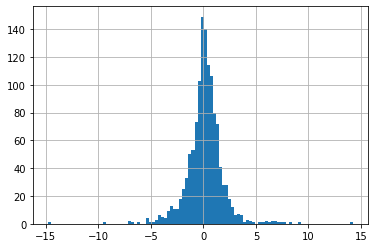

In [ ]:
df.Daily_change.hist(bins=100) #histogram rozkladu stopy zwrotu

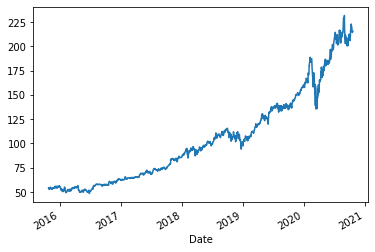

In [ ]:
df.Close.plot() #wykres cen zamkniecia

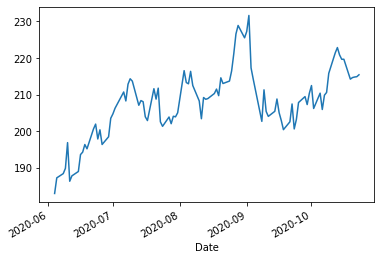

In [ ]:
df.head(100).Close.plot() #wykres zamkniecia ostatnie 100 notowan

#Filtrowanie danych

In [ ]:
df = df.head(100)
df

,High,Low,Open,Close,Volume,Adj Close,Average,Daily_change
Date,,,,,,,,
2020-10-23,215.729996,213.160004,215.029999,215.410004,10374700.0,215.410004,215.220001,0.241986
2020-10-22,216.059998,211.699997,213.929993,214.889999,22334100.0,214.889999,214.409996,0.041898
2020-10-21,216.919998,213.119995,213.119995,214.800003,22724900.0,214.800003,213.959999,0.069885
2020-10-20,217.369995,213.089996,215.800003,214.649994,22753500.0,214.649994,215.224998,0.200725
2020-10-19,222.300003,213.720001,220.419998,214.220001,27625800.0,214.220001,217.320000,-2.476556
...,...,...,...,...,...,...,...,...
2020-06-10,198.520004,191.009995,191.130005,196.839996,43872300.0,196.365326,193.985001,3.709164
2020-06-09,190.699997,187.259995,188.000000,189.800003,29783900.0,189.342300,188.900002,0.764495
2020-06-08,188.550003,184.440002,185.940002,188.360001,33211600.0,187.905777,187.150002,0.619660


In [ ]:
df_positive = df[df.Daily_change > 0]
df_positive.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2020-10-23 to 2020-06-05
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          59 non-null     float64
 1   Low           59 non-null     float64
 2   Open          59 non-null     float64
 3   Close         59 non-null     float64
 4   Volume        59 non-null     float64
 5   Adj Close     59 non-null     float64
 6   Average       59 non-null     float64
 7   Daily_change  59 non-null     float64
dtypes: float64(8)
memory usage: 4.1 KB


In [ ]:
df_negative = df[df.Daily_change < 0]
df_negative.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2020-10-19 to 2020-06-04
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          40 non-null     float64
 1   Low           40 non-null     float64
 2   Open          40 non-null     float64
 3   Close         40 non-null     float64
 4   Volume        40 non-null     float64
 5   Adj Close     40 non-null     float64
 6   Average       40 non-null     float64
 7   Daily_change  40 non-null     float64
dtypes: float64(8)
memory usage: 2.8 KB


In [ ]:
df[df.Daily_change == 0] #jeden dzien w ktorym sie nie zmienila wartosc akcji ani setna centa

,High,Low,Open,Close,Volume,Adj Close,Average,Daily_change
Date,,,,,,,,
2020-10-16,222.289993,219.320007,220.149994,219.660004,26057900.0,219.660004,219.904999,0.0


In [ ]:
#srednia pozytywna zmiana
df_positive.Daily_change.mean()

1.4886268386594348

In [ ]:
#srednia negatywna zmiana
df_negative.Daily_change.mean()

-1.7676696779800032

In [ ]:
df_negative.Daily_change.describe()

count    40.000000
mean     -1.767670
std       1.481483
min      -6.194686
25%      -2.178179
50%      -1.375237
75%      -0.708370
max      -0.078410
Name: Daily_change, dtype: float64

In [ ]:
#wszystkie sesje w tym roku
df = fetch_financial_data('MSFT')
df = df[df.index >= '2020-01-01']
#df = df[df.index.year == 2020] alternatywa
df.info

<bound method DataFrame.info of                   High         Low  ...      Volume   Adj Close
Date                                ...                        
2020-01-02  160.729996  158.330002  ...  22622100.0  159.352386
2020-01-03  159.949997  158.059998  ...  21116200.0  157.368179
2020-01-06  159.100006  156.509995  ...  20813700.0  157.774948
2020-01-07  159.669998  157.320007  ...  21634100.0  156.336395
2020-01-08  160.800003  157.949997  ...  27746500.0  158.826569
...                ...         ...  ...         ...         ...
2020-10-19  222.300003  213.720001  ...  27625800.0  214.220001
2020-10-20  217.369995  213.089996  ...  22753500.0  214.649994
2020-10-21  216.919998  213.119995  ...  22724900.0  214.800003
2020-10-22  216.059998  211.699997  ...  22334100.0  214.889999
2020-10-23  215.729996  213.160004  ...  10621390.0  215.050003

[206 rows x 6 columns]>

In [ ]:
#tylko ze stycznia
df[df.index.month == 1]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,159.352386
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,157.368179
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,157.774948
2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,156.336395
2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,158.826569
2020-01-09,162.220001,161.029999,161.839996,162.089996,21385000.0,160.810776
2020-01-10,163.220001,161.179993,162.820007,161.339996,20725900.0,160.066711
2020-01-13,163.309998,161.259995,161.759995,163.279999,21626500.0,161.991394
2020-01-14,163.600006,161.720001,163.389999,162.130005,23477400.0,160.850479


#Zapis i odczyt danych z plikow CSV i XLSX

In [ ]:
df = fetch_financial_data('FB')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-10-26 to 2020-10-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   int64  
 5   Adj Close  1259 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-26,103.809998,101.550003,102.199997,103.769997,25961200,103.769997
2015-10-27,104.099998,102.400002,102.940002,103.699997,23795500,103.699997
2015-10-28,104.480003,102.919998,103.900002,104.199997,24081500,104.199997
2015-10-29,105.120003,103.519997,103.959999,104.879997,20316700,104.879997
2015-10-30,104.720001,101.650002,104.510002,101.970001,33487100,101.970001


In [ ]:
df.to_csv('fb_akcje.csv') #zapisanie wszystkich akcji do pliku csv

In [ ]:
df[(df.index.year == 2020) & (df.index.month == 1)].to_csv('fb_akcje_2020_01') #styczen 2020 do pliku csv

In [ ]:
df[(df.index.year == 2020) & (df.index.month == 2)].to_csv('fb_akcje_2020_02') #luty 2020 do pliku csv

In [ ]:
fb_jan = pd.read_csv('fb_akcje_2020_01') #czytanie z pliku csv
fb_jan.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999
1,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998
2,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006
3,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998
4,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000,215.220001


In [ ]:
fb_feb = pd.read_csv('fb_akcje_2020_02', index_col=0)
fb_feb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-03,205.139999,202.500000,203.440002,204.190002,15510500,204.190002
2020-02-04,210.600006,205.199997,206.619995,209.830002,19628900,209.830002
2020-02-05,212.729996,208.710007,212.509995,210.110001,12538200,210.110001
2020-02-06,211.190002,209.339996,210.470001,210.850006,10567500,210.850006
2020-02-07,212.820007,209.929993,210.300003,212.330002,12242500,212.330002


In [ ]:
fb_feb.to_excel('fb_akcje_2020_02.xlsx') #zapisanie do excel

In [ ]:
fb_feb = pd.read_excel('fb_akcje_2020_02.xlsx', index_col=0) #odczytanie z excel
fb_feb #bez index_col tworzy nowa kolumne z indexami

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-02-03,205.139999,202.500000,203.440002,204.190002,15510500,204.190002
1,2020-02-04,210.600006,205.199997,206.619995,209.830002,19628900,209.830002
2,2020-02-05,212.729996,208.710007,212.509995,210.110001,12538200,210.110001
3,2020-02-06,211.190002,209.339996,210.470001,210.850006,10567500,210.850006
4,2020-02-07,212.820007,209.929993,210.300003,212.330002,12242500,212.330002
5,2020-02-10,213.800003,210.660004,211.520004,213.059998,11856400,213.059998
6,2020-02-11,210.860001,206.509995,210.190002,207.190002,25030800,207.190002
7,2020-02-12,211.220001,207.399994,207.850006,210.759995,13813700,210.759995
8,2020-02-13,214.330002,209.179993,209.520004,213.139999,15396600,213.139999
9,2020-02-14,214.929993,212.649994,214.000000,214.179993,10741700,214.179993
